In [5]:
import numpy as np
from generate_hnb import *
from itertools import product
import pandas as pd

In [6]:
# -------------------------------------------------------------
#  SIMULATION PLAN (MATCHES FENG 2021)
# -------------------------------------------------------------
def simulation_plan(
        B=200,                  # replications per setting (paper uses 200)
        n=300,                  # sample size (paper uses 300)
        k=2,                    # inflated point in your generator
        r=1,                    # NB dispersion (r=1 NB-like in paper)
        cov_type="binary",      # binary or continuous x
        beta0=0, gamma0=0, alpha0=0,   # intercepts fixed
        # parameter grids (paper varies α1 and β1 between -2 to +2)
        beta1_vals=np.linspace(-2, 2, 9),  
        gamma1_vals=np.linspace(-2, 2, 9),
        alpha1_vals=np.linspace(-2, 2, 9)
    ):
    
    results = []

    # Loop over the parameter grid exactly as the paper
    for beta1, gamma1, alpha1 in product(beta1_vals, gamma1_vals, alpha1_vals):

        print(f"Generating: β1={beta1}, γ1={gamma1}, α1={alpha1}")

        for rep in range(B):

            df = generate_hnb(
                n=n,
                k=k,
                beta0=beta0, beta1=beta1,
                gamma0=gamma0, gamma1=gamma1,
                alpha0=alpha0, alpha1=alpha1,
                r=r,
                cov_type=cov_type
            )
            
            results.append({
                "data": df,
                "params": {
                    "rep": rep,
                    "n": n, "k": k,
                    "beta0": beta0, "beta1": beta1,
                    "gamma0": gamma0, "gamma1": gamma1,
                    "alpha0": alpha0, "alpha1": alpha1,
                    "r": r,
                    "cov_type": cov_type
                }
            })

    return results

In [ ]:
#10 per 20s
#200 -> 2*200= 400s ~ 7 minutes

In [20]:
data=datasets = simulation_plan(
    B=200,
    n=300,
    cov_type="binary",
    beta1_vals=np.linspace(-2, 2, 9),
    gamma1_vals=np.linspace(-2, 2, 9),
    alpha1_vals=np.linspace(-2, 2, 9)
)


Generating: β1=-2.0, γ1=-2.0, α1=-2.0
3.7933333333333334
3.5
4.423333333333333
3.62
3.29
3.3833333333333333
3.6133333333333333
3.5166666666666666
2.92
3.2466666666666666
3.1766666666666667
3.5966666666666667
3.4433333333333334
3.933333333333333
3.5366666666666666
3.2266666666666666
4.333333333333333
3.0233333333333334
3.5533333333333332
3.32
3.3566666666666665
3.44
3.42
3.9633333333333334
2.93
4.286666666666667
3.276666666666667
3.6066666666666665
4.4
3.296666666666667
4.1066666666666665
2.756666666666667
3.09
3.216666666666667
4.413333333333333
4.303333333333334
3.61
3.256666666666667
3.29
3.8333333333333335
3.6766666666666667
3.6066666666666665
3.493333333333333
3.5233333333333334
3.3
3.4433333333333334
3.7933333333333334
3.473333333333333
3.2866666666666666
3.8266666666666667
4.38
3.1533333333333333
3.513333333333333
3.5
3.82
3.236666666666667
3.29
3.7466666666666666
3.9366666666666665
3.29
4.046666666666667
3.8
2.723333333333333
3.9566666666666666
2.7933333333333334
3.32
3.39333333

In [ ]:
import pickle

# Save results
with open('simulation_dataset_01.pkl', 'wb') as f:
    pickle.dump(data, f)

In [11]:
# Load later
with open('simulation_dataset.pkl', 'rb') as f:
    dfs = pickle.load(f)

In [22]:
len(data)

145800

In [ ]:
len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])

C:\Users\STD_IndTrainee3\AppData\Local\Temp\ipykernel_5272\3037761798.py:1: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])


2

In [80]:
for i in data:
    if (i['params']['beta1']==0) and (i['params']['gamma1']==0) and (i['params']['alpha1']==2):
        df=i['data']
        print(df['y'].value_counts())
        break

y
0    154
2    146
Name: count, dtype: int64


In [ ]:
l=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    l.append(len(df['y'].value_counts()))
                    

In [85]:
np.mean(l)

np.float64(5.087798353909465)

(array([8.7039e+04, 1.8566e+04, 5.8950e+03, 8.6620e+03, 6.3100e+03,
        2.5640e+03, 4.0870e+03, 3.2730e+03, 1.2820e+03, 2.2500e+03,
        1.8210e+03, 7.5700e+02, 1.1540e+03, 9.6700e+02, 3.5800e+02,
        5.2600e+02, 2.3400e+02, 4.0000e+01, 1.2000e+01, 3.0000e+00]),
 array([ 2.  ,  3.65,  5.3 ,  6.95,  8.6 , 10.25, 11.9 , 13.55, 15.2 ,
        16.85, 18.5 , 20.15, 21.8 , 23.45, 25.1 , 26.75, 28.4 , 30.05,
        31.7 , 33.35, 35.  ]),
 <BarContainer object of 20 artists>)

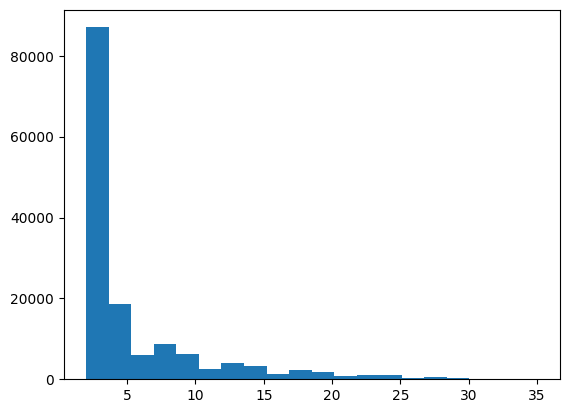

In [92]:
import matplotlib.pyplot as plt
plt.hist(l, bins=20)

In [93]:
abg=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    if len(df['y'].value_counts())>5:
                        abg.append({
                            'beta1':beata,
                            'gamma1':gamma,
                            'alpha1':alpha
                        })
                    

In [95]:
len(abg)/len(l)*100

27.568587105624143

In [99]:
pd.DataFrame(abg).duplicated().sum()

np.int64(39917)

In [101]:
abg_df=pd.DataFrame(abg).drop_duplicates()

In [105]:
abg_df.to_csv('parameter_combinations_with_gt5_classes.csv', index=False)